### MNIST Handwritten Digits Reconition Using CNN

In [111]:
## Importing all the required libraries

# Note that Keras is built into TF 2.0
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# parsing & math libraries
import os
import pandas as pd
import numpy as np
import random
import itertools

# plotting libraries
import seaborn as sns
#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import title
%matplotlib inline

# importing sci-kit learn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# testing the imports by printing versions
print("Tensorflow Version: "+ tf.version.VERSION)
print("Keras Version: "+ tf.keras.__version__)
print("Sci-Kit Learn Version: "+ sklearn.__version__)
print("Wget Version: "+ wget.__version__)

Tensorflow Version: 2.9.1
Keras Version: 2.9.0
Sci-Kit Learn Version: 1.1.1
Wget Version: 3.2


##### To train the dataset you have to create an input folder and download the data from https://www.kaggle.com/datasets/mloey1/ahdd1?resource=download 

In [112]:
# Checking to make sure the dataset was downloaded properly 
# Note I made an input folder ./kaggle/input
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\csvTestImages 10k x 784.csv
./kaggle/input\csvTestLabel 10k x 1.csv
./kaggle/input\csvTrainImages 60k x 784.csv
./kaggle/input\csvTrainLabel 60k x 1.csv
./kaggle/input\Train + Test Matlab.mat
./kaggle/input\Arabic Handwritten Digits Dataset CSV\csvTestImages 10k x 784.csv
./kaggle/input\Arabic Handwritten Digits Dataset CSV\csvTestLabel 10k x 1.csv
./kaggle/input\Arabic Handwritten Digits Dataset CSV\csvTrainImages 60k x 784.csv
./kaggle/input\Arabic Handwritten Digits Dataset CSV\csvTrainLabel 60k x 1.csv
./kaggle/input\csvTrainImages 60k x 784\csvTrainImages 60k x 784.csv


In [113]:
#df = pd.read_csv('/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv')
#df_label = pd.read_csv('/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv')

##### Plotting the Training Data Distribution

Image Shape: (59999, 784)
Label Shape: (60000, 1)


C:\Users\npace\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


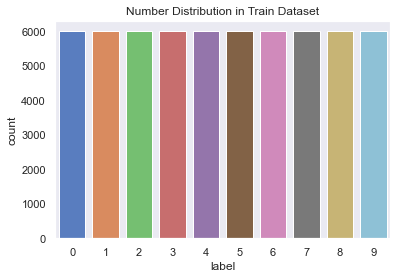

In [114]:
# Let's look at the given data distribution

train_labels= pd.read_csv("./kaggle/input/csvTrainLabel 60k x 1.csv", header=None, usecols=[0], names=['label'])
train_images = pd.read_csv("./kaggle/input/csvTrainImages 60k x 784.csv")

#print(train_labels.value_counts())

# let's look at the shape of the data
print("Image Shape: "+ str(train_images.shape))
print("Label Shape: "+ str(train_labels.shape))

graph = sns.countplot(train_labels['label']).set(title='Number Distribution in Train Dataset')

##### Outputting a Random Digit Image Non-Normalized and then Normalized

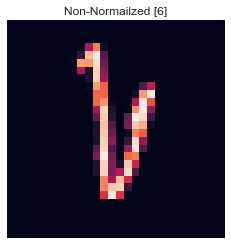

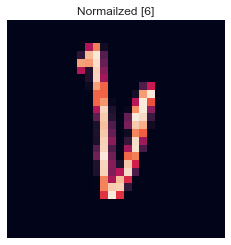

In [115]:
# since the pixel value has a max of 255 the normalization factor is 1/255
NORMALIZATION_FACTOR = 1/255

# get a random sample image
image_sample_number = random.randrange(1,train_images.shape[0])
image_sample = np.rot90(train_images.iloc[image_sample_number].values.reshape((28,28)),3)

# plot the sample image
plt.imshow(image_sample)
plt.axis('off')
plt.title("Non-Normailzed "+str(train_labels.iloc[image_sample_number].values))
plt.show()

# plot the normalized sample image
plt.imshow(image_sample*NORMALIZATION_FACTOR)
plt.axis('off')
plt.title("Normailzed "+str(train_labels.iloc[image_sample_number].values))
plt.show()
